In [2]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import seaborn as sns

# Решение СЛАУ

In [3]:
n = 5

def create_matrix(n):
    a = -1 * np.triu(np.ones(n)) + np.eye(n)*2
    a[:, -1] *= -1
    a[:, -1][-1] *= -1
    return np.array(a)
a = create_matrix(n)
f = np.ones(n)
a

array([[ 1., -1., -1., -1.,  1.],
       [ 0.,  1., -1., -1.,  1.],
       [ 0.,  0.,  1., -1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [4]:
def lu(a):
    l = np.zeros([n, n])
    u = np.zeros([n, n])

    for i in range(n):
        for j in range(n):
            u[0][i] = a[0][i]
            l[i][0] = a[i][0] / u[0][0]
            sum = 0
            for k in range(i):
                sum += l[i][k] * u[k][i]
            u[i][j] = a[i][j] - sum
            if i > j:
                l[i][j] = 0
            else:
                sum = 0
                for k in range(i):
                    sum += l[j][k] * u[k][i]
                l[j][i] = (a[j][i] - sum) / u[i][i]
    return (np.array(l), np.array(u))


In [5]:
def solution(a, f):
    l, u = lu(a)
    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i):
            sum += l[i][k] * y[k]
        y[i] = (f[i] - sum) / l[i][i]

    x = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i):
            sum += u[n-i - 1][n-k - 1] * x[n-k - 1]
        x[n-i - 1] = (f[n-i - 1] - sum) / l[n-i - 1][n-i - 1]

    return x


solution(a, f)


array([0., 0., 0., 0., 1.])

# Расчет числа обусловленности:

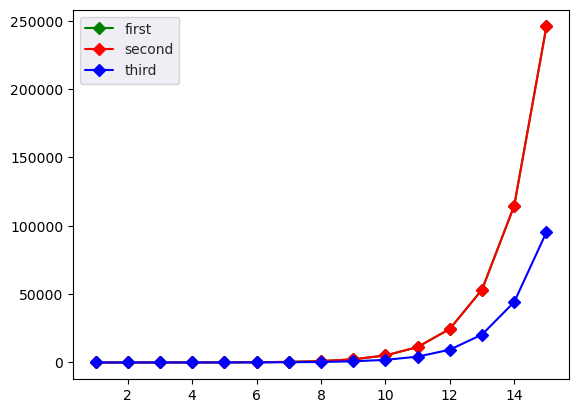

In [6]:
def norm_1(a):
    return max([sum(np.absolute(i)) for i in a.T])

def norm_2(a):
    return max([sum(np.absolute(i)) for i in a])

def norm_3(a):
    return (max(np.linalg.eig(np.dot(a, a.T))[0]))**0.5


def plot(n=10):
    first = [norm_1(create_matrix(i)) * norm_1(inv(create_matrix(i))) for i in range(1, n + 1)]
    second = [norm_2(create_matrix(i)) * norm_2(inv(create_matrix(i))) for i in range(1, n + 1)]
    third = [norm_3(create_matrix(i)) * norm_3(inv(create_matrix(i))) for i in range(1, n + 1)]


    fig, ax = plt.subplots()

    sns.set_style('darkgrid')

    ax.plot([i for i in range(1, n + 1)], first, 'gD-', label='first')
    ax.plot([i for i in range(1, n + 1)], second, 'rD-', label='second')
    ax.plot([i for i in range(1, n + 1)], third, 'bD-', label='third')
    ax.legend()
plot(15)